# **Back propagation**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from PIL import Image
from pprint import pprint
import sys
from colorama import Style, Fore
import warnings
import time 
import datetime as dt 



warnings.filterwarnings(action = 'ignore')

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

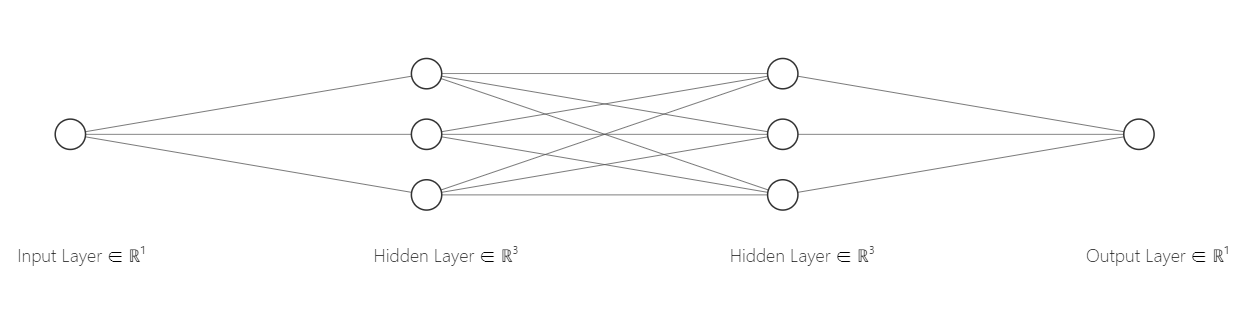

In [4]:
Image.open("C:/Users/whileduck/Desktop/dnn.png")

단일 노드일 때는 역전파 과정이 직관적으로 이해 됐지만 

한 노드가 연결된 부위가 여러개일 때는 어떻게 역전파가 진행되는지에 대해 수식으로 정리 하고 싶어서 공부해봤다.

# **Notation**

$W^{l}_{i,j}$ = l 번째 레이어에서 i 번째 node 에서 l+1 번째 레이어의 j 번째 node 로 연결되어 있는 가중치

$N^{l}_{i}$ = l 번째 레이어에서 i 번째 node

$Z^{l}_{i}$ = l번째 레이어에서 l-1 번째 노드들의 출력값과 가중치 벡터의 선형결합 얻어진 i 번째 node 의 값 

$a^{l}_{i}$ = l번째 레이어에서 i 번재 출력값인 $Z^{l}_{i}$ 을 활성화 함수로 감싼 형태 (l 은 0 ~ 전체 레이어 개수 까지, l이 0 일때는 input 값을 의미) 

$g^{l}$ = l 번째 레이어의 모든 노드들에게 적용되는 활성화 함수 

$Loss$ = 해당 DNN 의 $Loss \ function$

예시를 통해서 back propagation을 진행해보자 

역전파를 하기 위해서 먼저 front propagation 이 되어 모든 Z , a  값들이 모두 정해졌으며 모든 레이어의 활성화 함수는 sigmoid 함수라고 가정해보자

$W^{0}_{1,2}$ 에게 전달되는 역전파를 구하고 싶다고 해보자 

$\frac{\partial Loss}{\partial w^{0}_{1,2}}$ = ? 

단일 퍼셉트론 때 역전파 과정을 통해서 체인룰을 이용해서 구해야 한다는 것은 알고 있다.

$\frac{\partial Loss}{\partial w^{0}_{1,2}}$ 를 구하려면 우선 $W^{0}_{1,2}$ 와 연결되어 있는 node의 출력값인 $\frac{\partial Loss}{\partial a^{1}_{2}}$ 를 구해야 한다.

반복되는 표기를 피하기 위해서 앞으로 

$\delta^{l}_{i} = \frac{\partial Loss}{\partial a^{l}_{i}}$ 

로 표기하도록 하겠다.

$\delta^{l}_{i}$ 는 l 번재 레이어, i 번째 node 의 출력값의 Loss fucntion 에 대한 미분값이다.

$\delta^{1}_{2}$을 구하기 위해서는 세 가지가 필요하다 .

##### **1. $\frac{\partial Loss}{\partial a^{l}_{i}}$  : l 번째 node의 output과 Loss function에 대한 미분 계수**


$N^{1}_{2}$ 와 fully connect 되어 있는 $N^{2}_{1},N^{2}_{2},N^{2}_{3}, N^{3}_{1}$ 들에 있는 출력값($a^{l}_{i}$)들의 Loss function에 대한 미분값인 $\delta^{2}_{1},\delta^{2}_{2},\delta^{2}_{3},\delta^{3}_{1}$ 들이 필요하다. $N^{1}_{2}$ 는 $output$ 값 까지 모든 laeyr의 모든 node 들에 대해서 fully connect 되어 있기 때문이다.


##### **2. $\frac{\partial a^{l}_{i}}{\partial z^{l}_{i}}$ : $z^{l}_{i}$ 에서 $a^{l}_{i}$로 넘어갈 때의 미분 계수**

$N^{l}_{i}$ 의 $a^{l}_{i}$ 들의 대한 미분 계수는 구했으니 $N^{l}_{i}$ 안에서 진행되는 $z^{l}_{i}$ 에서 활성화 함수를 씌워 만들어진 $a^{l}_{i}$ 에 대해서 미분을 취해줘야 한다. 이 또한 $g'^{l}(z^{l}_{i})$로 표현하도록 하겠다. $\frac{\partial a^{l}_{i}}{\partial z^{l}_{i}}$ 를 의미한다.

##### 3. $\frac{\partial z^{l+1}_{j}}{\partial a^{l}_{i}}$ : l 번째 레이어의 i 번째 node 에서 l+1 번째 레이어의 j 번째 node 로 넘어갈 때의 미분 계수

각 l 번째 layer 의 출력값들인 $a^{l}_{i}$ 들이 $W^{l}_{i,j}$ 들과 선형 결합되어 $N^{l+1}_{j}$ 의 입력값인 $Z^{l+1}_{j}$ 를 생성하기 때문이다.


구해야 하는 것은 위 3 가지인데, 체인룰로 인해서 2번을 제외한 1번과 3번은 이해하기 쉽다.

3번을 먼저 풀고 가보자 

$\frac{\partial z_j^{l+1}}{\partial a^{l}_{i}}$ 는 쉽게 구해진다. $z^{l}_{j+1}$ 은 l 번째 node의 모든 출력값들인 $a^{l}_{i}$들과 $w^{l}_{i,j}$들의 선형결합으로 만들어 져있기 때문에 $a^{l}_{i}$ 로 편미분을 하면, $N^{l}_{i}$ 와 $N^{l+1}_{j}$ 를 잇는 가중치인 $w^{l}_{i,j}$ 만 남는다.


$\delta^{l}_{i}$ 를 구하기 위해서는 체인룰로 인해서 $a^{i}_{l}$ 이 순전파 되는 Node 들에 대한 $\delta^{l+1}_{1}, \delta^{l+2}_{2} ... \delta^{l+k}_{j}$를 구해야 한다. k 는 l 번째 레이어부터 마지막 출력 노드까지의 숫자를 의미한다. l+k 는 출력 노드의 레이어, j 는 각 l+k 번째 레이어의 노드들의 숫자를 의미한다.

예시를 통해 쉽게 이해해보자면 

$\delta ^{2}_{1}$ 은 체인룰로 인해서 $\frac{\partial z^{3}_{1}}{\partial a^{2}_{1}}$ *$\frac{\partial a^{3}_{1}}{\partial z^{3}_{1}}$*$\frac{\partial Loss}{\partial a^{3}_{1}}$ 이란걸 알 수 있다. 위에서 정리한 notaion 으로 다시 적으면 

$\delta ^{2}_{1}$ = $W^{2}_{1,1}$*$g^{'3}(z^{3}_{1})$ * $\delta^{3}_{1}$ 임을 알 수 있다.



그렇다면 우리가 가장 구하고 싶은 $\frac{\partial Loss}{\partial W^{0}_{1,2}}$ 는 caine rule 로 인해서 $N^{1}_{2}$ 까지 받아지는 전체 역전파들에다가 $\frac{\partial a^{1}_{2}}{\partial z^{1}_{2}} * \delta ^{1}_{2}$ 를 곱해주면 된다. 

위에서 설명했듯이 모든 전체 역전파를 더해주는 이유는 $N^{1}_{2}$ 는 출력 노드까지 모두 fully connect 되어 있기 때문이다.

$N^{1}_{2}$ 가 받는 전체 역전파들은 $N^{2}_{1}$ 로 부터 $\delta ^{2}_{1} * w^{1}_{2,1}$ , $N^{2}_{2}$ 로 부터 $\delta ^{2}_{2} * w^{1}_{2,2}$ ... $N^{3}_{1}$ 으로 부터 $\delta ^{3}_{1} * w^{2}_{1,1} , \delta ^{3}_{1} * w^{2}_{1,2} $ 을 받을 것이다.  

이렇게 N^{1}_{2} 가 받는 역전파들을 시그마와 벡터를 이용해서 표현해보자

$W^{l} = [w^l_{1,1},w^{l}_{1,2} ... w^l_{i,j}]$ l 번째 레이어에 있는 i 개의 노드들과 l + 1 번째 레이어에 있는 j 번째 노드와 연결되는 가중치를 담은 벡터

$\delta ^{l+1} = [\delta^{l+1}_{1}  , \delta ^{l+1}_{2} ... \delta^{l+1}_{j}]$ l+1 번재 레이어에 있는 j 개의 노드들의 $\delta$ 를 담은 벡터

[$\delta^{l}$ 벡터는 W^{l}들과 같은 차원을 가진 벡터로서 중복된 원소들이 존재 한다. 예를 들어 $w^{l}_{1,1} , w^{l}_{1,2}$ 들이 있다면 $\delta^{l}_{2}$ 는 두 개 존재한다 ]

$N^{1}_{2}$ 가 받는 역전파들은 $= \sum_{k = 1}^{K} W^{k} \delta ^{k + 1}$ 로 표현 할 수 있을 것이다.  (K 는 현재 레이어로부터 출력 레이어 까지의 차이)

$N^{1}_{2}$ 가 받는 역전파들은 모두 구했으니 $N^{1}_{2}$ 안에서 진행되는 역전파 과정을 구해보자면 

$\frac{\partial a^{1}_{2}}{z^{1}_{2}} = g'^{l}(z^{1}_{2})$ 로 구할 수 있다.

그러면 결국 $\frac{\partial Loss}{\partial w^{0}_{1,2}}$ 는 $  g'^{l}(z^{1}_{2}) * \sum_{k = 1}^{K} W^{k} \delta ^{k + 1}$ 임을 알 수 있다. 

좀 더 일반화 된 식으로 적으면

$\frac{\partial Loss}{\partial w^{l}_{i,j}} =   g'^{l+1}(z^{l+1}_{j}) * \sum_{n = 1}^{N} W^{l+1}_{j,n} \delta ^{l + 1}_{n}$

임을 알 수 있다.

 위에서는 모든 레이어에 대해서 표현하기 위해서 벡터로 표현하고 그러느라 수식이 더러웠지만 

 $l$ 번째 layer 의 $W_{i,j}$ 를 구하기 위해서는 $W^{l}_{i,j}$ 와 연결 되어 있는 Node 인 $N^{l+1}_{j}$ 가 받는 모든 역전파들과 $N^{l+1}_{j}$ 내부에서 일어나는 역전파를 구하면 된다는 문장이다. 

사실 이렇게 해도 결국에는 출력파부터의 $\delta$ 를 구해야 한다.